<a href="https://colab.research.google.com/github/sayarghoshroy/Optimization_and_Learning/blob/master/Optimization_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Optimization and Learning*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## *Problem 1*

$We\ consider\ the\ following\ linear\ regression\ function:$
$y = 2x_1 + 3x_2$

$We\ sample\ y(s)\ of\ the\ form\ y^i\ =\ 2x_1^i + 3x_2^i + \epsilon$

$Here; \epsilon ∼ \mathcal{N}(0, 0.01)$

$We\ generate\ 400\ samples\ (x_1^i, x_2^i)\ uniformly\ from\ [−4, 4]^2\ with\ their\ corresponding\ y^i\ values.$

In [0]:
# Data Creation
N_samples = 400
x_1 = np.random.uniform(low= - 4.0, high = 4.0, size=N_samples)
x_2 = np.random.uniform(low = -4.0, high = 4.0, size=N_samples)
noise = np.random.normal(0, 0.01, N_samples)
y = 2 * x_1 + 3 * x_2 + noise

$let\ y' = a.x_1 + b.x_2$

$J\enspace = \frac{1}{N}||y' - y||_2$

$\quad\ = \frac{1}{N}(y'-y)^T(y'-y)$

$\quad\ = \frac{1}{N}(y'^T-y^T).(y'-y)$

$\quad\ = \frac{1}{N}(y'^T.y' - y'^Ty - y^Ty' - y^Ty)$

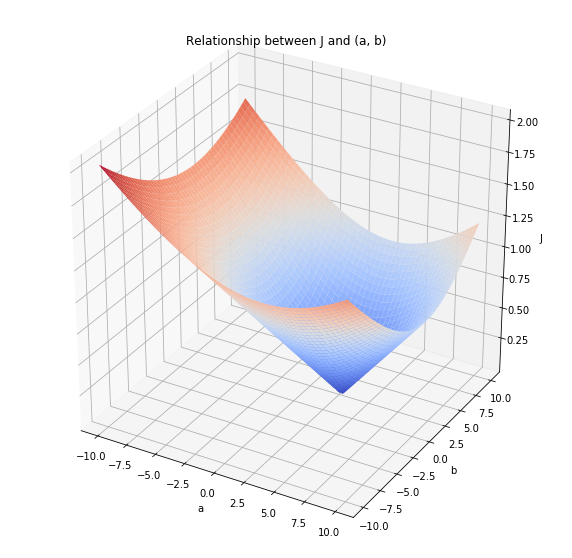

In [0]:
a = np.linspace(-10, 10, 200)
b = np.linspace(-10, 10, 200)
# a, b are the parameter values

X, Y = np.meshgrid(a, b)
J = np.ones(shape = (len(a), len(b)))

# compute J for all pairs of a, b
for i in range(len(a)):
    for j in range(len(b)):
        J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2)) / N_samples

# creating the 3D Plot
fig = plt.figure(figsize=(10, 10))
sub = fig.add_subplot(111, projection='3d')
sub.set_title('Relationship between J and (a, b)')
sub.set_xlabel('a')
sub.set_ylabel('b')
sub.set_zlabel('J')
sub.plot_surface(X, Y, J, cmap = cm.coolwarm)
plt.show()

In [0]:
# NOTE: For the purpose of coding, I am not considering the division by number of samples
# This is a normalizing denominator and is absorbed into multiplicative constants

$Computing\ optimal\ learning\ rate\ to\ minimize\ J\ using\ gradient\ descent.$

$\frac{\partial J}{\partial a} = \frac{2}{N}y'.\frac{\partial y'}{\partial a} - \frac{2}{N}y \frac{\partial y'}{\partial a}$

$ = \frac{2}{N}(y' - y)\frac{\partial y'}{\partial a}$

$Similarly,\ \frac{\partial J}{\partial b} = \frac{2}{N}(y' - y)\frac{\partial y'}{\partial b}$

$Now,\ \frac{\partial y'}{\partial a} = x_1,$
$\ \frac{\partial y'}{\partial b} = x_2$

$Therefore:$

$\frac{\partial J}{\partial a} = \frac{2}{N}(ax_1 + bx_2 - y).x_1 = \frac{2}{N}ax_1.x_1 + \frac{2}{N}bx_1.x_2 - \frac{2}{N}y.x_1$

$\frac{\partial J}{\partial b} = \frac{2}{N}(ax_1 + bx_2 - y).x_2 = \frac{2}{N}ax_1.x_2 + \frac{2}{N}bx_2.x_2 - \frac{2}{N}y.x_2$

$Computing\ Hessian\ Matrix\ H(a, b):$

- $\frac{\partial^2 J}{\partial a^2} = \frac{2}{N}x_1.x_1$

- $\frac{\partial^2 J}{{\partial a}.{\partial b}} = \frac{2}{N}x_1.x_2$

- $\frac{\partial^2 J}{{\partial b}.{\partial a}} = \frac{2}{N}x_1.x_2$

- $\frac{\partial^2 J}{\partial b^2} = \frac{2}{N}x_2.x_2$

$H(a, b) = H = \frac{2}{N}\begin{pmatrix} x_1.x_1 & x_1.x_2 \\ x_1.x_2 & x_2.x_2 \end{pmatrix}$

$\nabla J =\bigg [\frac{\partial J}{\partial a}\quad \frac{\partial J}{\partial b}\bigg ]$

$Now,\ Optimal\ Learning\ Rate\ \ \eta_{opt} = \frac{||\nabla J||^2}{\nabla J^T\ H\ \nabla J}$

$We\ make\ an\ approximation,\ \eta_{opt} = \frac{1}{max(eigenvalue(H))}$

$where\ eigenvalue(H)\ is\ the\ set\ of\ eigenvalues\ of\ H$

In [0]:
# calculating the optimal learning rate:

Hessian = 2 * np.asarray([[np.dot(x_1, x_1), np.dot(x_1, x_2)], [np.dot(x_1, x_2), np.dot(x_2, x_2)]])
eigvals, _ = np.linalg.eig(Hessian)
eta_opt = 1 / max(eigvals)
print("Optimal Learning Rate:", str(eta_opt))

Optimal Learning Rate: 0.0002309218279447345


In [0]:
def loss(a, b):
    return np.linalg.norm((a * x_1 + b * x_2) - y) / N_samples

def gradient_descent(eta_multiplier):
    global Hessian
    a = b = 0
    errors = [loss(a, b)]
    seq = [(0, 0)]
    MAX_ITER = 100
    iteration = 0

    while errors[-1] >= 1e-3 and iteration < MAX_ITER:
        # using the accurate version of optimal learning rate
        del_J_del_a = 2 * a * np.dot(x_1, x_1) + 2 * b * np.dot(x_1, x_2) - 2 * np.dot(y, x_1)
        del_J_del_b = 2 * a * np.dot(x_1, x_2) + 2 * b * np.dot(x_2, x_2) - 2 * np.dot(y, x_2)
        del_J = np.asarray([del_J_del_a, del_J_del_b])
        if np.matmul(np.matmul(del_J.T, Hessian), del_J) == 0:
            # indicates optimum has been reached
            break
            
        eta_opt = np.dot(del_J, del_J) / np.matmul(np.matmul(del_J.T, Hessian), del_J)
        
        eta = eta_opt * eta_multiplier

        # update step
        a = a - eta * del_J_del_a
        b = b - eta * del_J_del_b
        seq.append((a, b))
        errors.append(loss(a, b))
        iteration += 1
    
    return errors, seq, a, b

In [0]:
def make_plot(seq, errors):
    make_error_plot(errors)
    make_convergence_plot(seq)

def make_error_plot(errors):
    fig = plt.figure(figsize=(7, 7))
    p = fig.add_subplot('111')
    p.set_title('Error v/s Epoch')
    p.set_xlabel('Epoch Number')
    p.set_ylabel('Error')
    p.plot(list(range(1, len(errors))), errors[1:])
    plt.show()

def make_convergence_plot(seq, problem = 1, xlabel = 'a', ylabel = 'b'):
    # problem can be 1, 2, 3
    fig = plt.figure(figsize=(7, 7))
    q = fig.add_subplot('111')

    a_min = min([s[0] for s in seq])
    a_max = max([s[0] for s in seq])

    b_min = min([s[1] for s in seq])
    b_max = max([s[1] for s in seq])

    eps = 0.95
    if xlabel == 'a':
        eps = 0.2

    if problem == 1:
        a = np.linspace(a_min - eps, a_max + eps, 500)
        b = np.linspace(b_min - eps, b_max + eps, 500)
    
    else:
        a = np.linspace(-1, 1, 500)
        b = np.linspace(-1, 1, 500)

    X, Y = np.meshgrid(a, b)
    J = np.ones(shape = (len(a), len(b)))

    # compute J for all pairs of a, b
    for i in range(len(a)):
        for j in range(len(b)):
            if problem == 1:
                J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2))
            elif problem == 2:
                J[i][j] = a[i] * a[i] + 100 * np.power((b[j] - a[i] * a[i]), 2) 
            elif problem == 3:
                J[i][j] = 50 / 9 * np.power((a[i] * a[i] + b[j] * b[j]), 3) - 209 / 18 * np.power((a[i] * a[i] + b[j] * b[j]), 2) + 59 / 9 * (a[i] * a[i] + b[j] * b[j])
    
    q.set_title('Convergence Path')
    q.set_xlabel(xlabel)
    q.set_ylabel(ylabel)
    q.contour(X, Y, J, cmap = cm.coolwarm)

    # plotting the arrow-ed path
    aspace = 0.1 # scaling factor

    # r is the distance spanned between pairs of points
    r = [0]
    for i in range(1,len(seq)):
        dx = seq[i][0]-seq[i-1][0]
        dy = seq[i][1]-seq[i-1][1]
        val = np.sqrt(dx ** 2 + dy ** 2)
        r.append(val)
    r = np.asarray(r)

    # r_sum is the cumulative sum of r
    r_sum = []
    for i in range(len(r)):
        r_sum.append(r[0: i].sum())
    r_sum.append(r.sum())

    arrow_data = [] # holds tuples of (x, y, theta) for each arrow
    arrow_pos = 0 # current point on walk along data
    r_count = 1

    while arrow_pos < r.sum():
        x1, x2 = seq[r_count-1][0], seq[r_count][0]
        y1, y2 = seq[r_count-1][1], seq[r_count][1]
        da = arrow_pos - r_sum[r_count] 
        theta = np.arctan2((x2 - x1), (y2 - y1))
        ax = np.sin(theta) * da + x1
        ay = np.cos(theta) * da + y1

        arrow_data.append((ax, ay, theta))
        arrow_pos += aspace

        while arrow_pos > r_sum[r_count + 1]: 
            r_count += 1
            if arrow_pos > r_sum[-1]:
                break

    for ax, ay, theta in arrow_data:
        q.arrow(ax, ay, np.sin(theta) * aspace / 10, np.cos(theta) * aspace / 10, head_width = aspace / 2.5 , head_length = aspace / 1.5 , color = 'darkgreen')

    q.plot([s[0] for s in seq], [s[1] for s in seq], color = 'green')
    

    plt.show()

---

## $\ \eta = \frac{0.9}{2}\ \eta_{opt}$

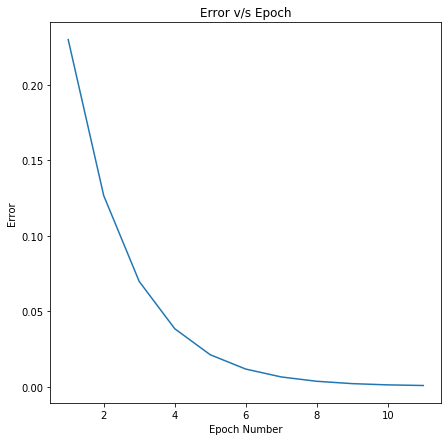

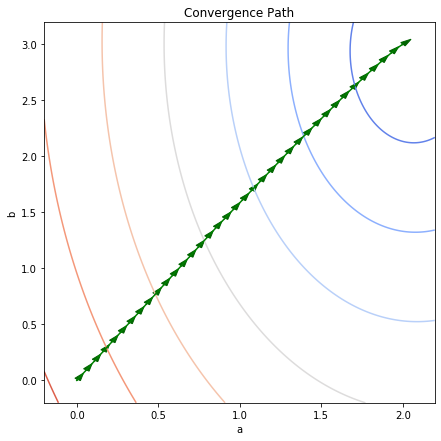

Optimal Values for: 
a : 1.9957804147129297
b : 2.997266991628386


In [0]:
# eta = (0.9 / 2) * eta_opt
e, s, a_opt, b_opt = gradient_descent((0.9 / 2))
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

---

## $\ \eta = \frac{1.5}{2}\ \eta_{opt}$

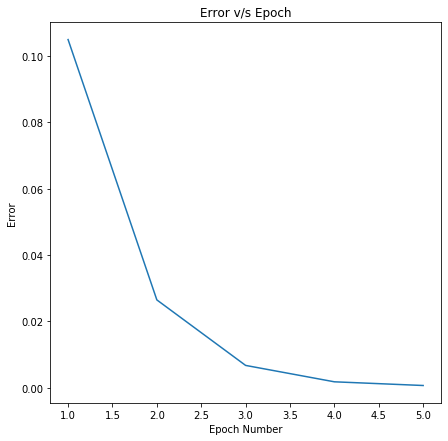

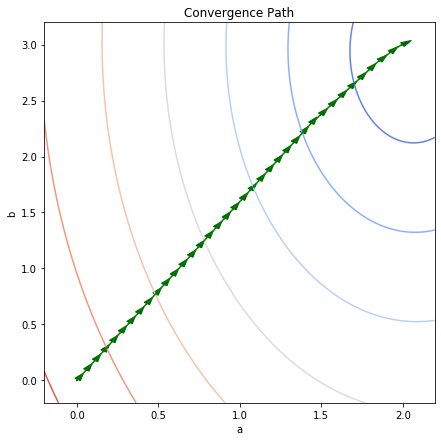

Optimal Values for: 
a : 1.9963714313971155
b : 2.9989235094283573


In [0]:
# eta = (1.5 / 2) * eta_opt
e, s, a_opt, b_opt = gradient_descent((1.5 / 2))
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

---

## $\ \eta = \eta_{opt}$

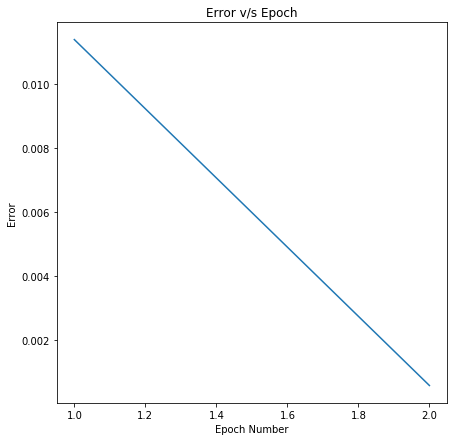

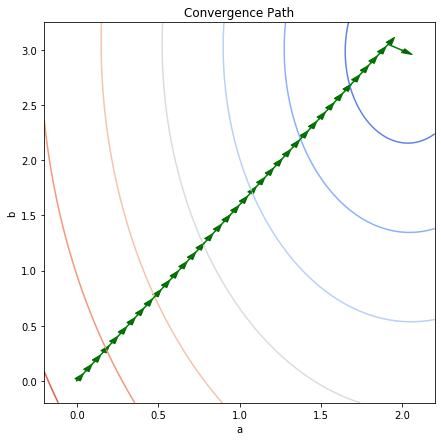

Optimal Values for: 
a : 1.9984347476321593
b : 2.9981522037230355


In [0]:
# eta = eta_opt
e, s, a_opt, b_opt = gradient_descent(1)
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

---

## $\ \eta = 1.5\ \eta_{opt}$

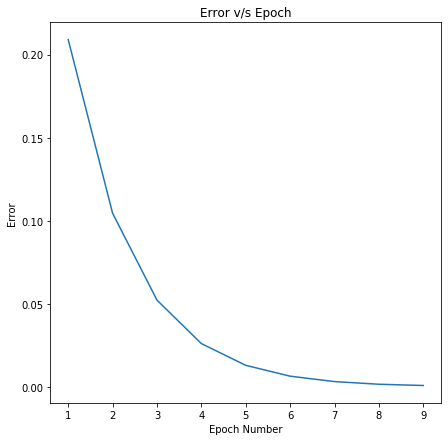

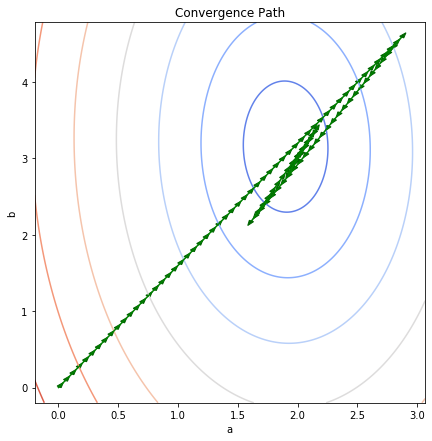

Optimal Values for: 
a : 2.0019234241506596
b : 3.0071165414657512


In [0]:
# eta = (1.5) * eta_opt
e, s, a_opt, b_opt = gradient_descent(1.5)
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

# *Problems 2 and 3*

### *Implementing Functionality for four different kinds of Gradient Descent*

In [0]:
def check_convergence(seq):
    threshold = 1e-8
    if len(seq) > 1 and np.abs(seq[-1][0] - seq[-2][0]) < threshold and np.abs(seq[-1][1] - seq[-2][1]) < threshold:
        return True
    return False

In [0]:
def plain_gradient_descent(f, grad_x, grad_y):
    # f is the function to be minimized
    # grad_x and grad_y are functions which accept (x, y)
    # and return partial derivatives of f w.r.t x and y respectively
    
    x = np.random.random()
    y = np.random.random()
    # initialized values

    seq = [(x, y)] # sequence of x, y
    MAX_ITER = 1e5
    iteration = 0
    eta = 1e-3

    while iteration < MAX_ITER and check_convergence(seq) == False:
        # update step
        del_x = grad_x(x, y)
        del_y = grad_y(x, y)
        x = x - eta * del_x
        y = y - eta * del_y
        
        seq.append((x, y))
        iteration += 1
    
    print("Number of Iterations: " + str(iteration))
    print("f* = " + str(f(x, y)))
    print("(x*, y*) = " + "(" + str(seq[-1][0]) + ", " + str(seq[-1][1]) + ")")
    return seq

In [0]:
def polyak_gradient_descent(f, grad_x, grad_y):
    # f is the function to be minimized
    # grad_x and grad_y are functions which accept (x, y)
    # and return partial derivatives of f w.r.t x and y respectively
    
    x = np.random.random()
    y = np.random.random()
    V_x = [0]
    V_y = [0]
    # initialized values

    seq = [(x, y)] # sequence of x, y
    MAX_ITER = 1e5
    iteration = 0
    alpha = 1e-4
    beta = 0.9

    while iteration < MAX_ITER and check_convergence(seq) == False:
        # update step
        del_x = grad_x(x, y)
        del_y = grad_y(x, y)

        V_x.append(beta * V_x[-1] + (1 - beta) * del_x)
        V_y.append(beta * V_y[-1] + (1 - beta) * del_y)
                   
        x = x - alpha * V_x[-1]
        y = y - alpha * V_y[-1]
        
        seq.append((x, y))
        iteration += 1
    
    print("Number of Iterations: " + str(iteration))
    print("f* = " + str(f(x, y)))
    print("(x*, y*) = " + "(" + str(seq[-1][0]) + ", " + str(seq[-1][1]) + ")")
    return seq

In [0]:
def nesterov_gradient_descent(f, grad_x, grad_y):
    # f is the function to be minimized
    # grad_x and grad_y are functions which accept (x, y)
    # and return partial derivatives of f w.r.t x and y respectively
    
    x = np.random.random()
    y = np.random.random()
    V_x = [0]
    V_y = [0]
    # initialized values

    seq = [(x, y)] # sequence of x, y
    MAX_ITER = 1e5
    iteration = 0
    alpha = 1e-4
    beta = 0.9

    while iteration < MAX_ITER and check_convergence(seq) == False:
        # update step
        x_star = x - alpha * V_x[-1]
        y_star = y - alpha * V_y[-1]
        
        del_x = grad_x(x_star, y_star)
        del_y = grad_y(x_star, y_star)

        V_x.append(beta * V_x[-1] + (1 - beta) * del_x)
        V_y.append(beta * V_y[-1] + (1 - beta) * del_y)
                   
        x = x - alpha * V_x[-1]
        y = y - alpha * V_y[-1]
        
        seq.append((x, y))
        iteration += 1

    print("Number of Iterations: " + str(iteration))
    print("f* = " + str(f(x, y)))
    print("(x*, y*) = " + "(" + str(seq[-1][0]) + ", " + str(seq[-1][1]) + ")")
    return seq

In [0]:
def adam_gradient_descent(f, grad_x, grad_y):
    # f is the function to be minimized
    # grad_x and grad_y are functions which accept (x, y)
    # and return partial derivatives of f w.r.t x and y respectively
    
    x = np.random.random()
    y = np.random.random()
    V_x = V_y = S_x = S_y = [0]
    # initialized values

    seq = [(x, y)] # sequence of x, y
    MAX_ITER = 1e5
    iteration = 0
    alpha = 0.5 * 1e-4
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-8

    while iteration < MAX_ITER and check_convergence(seq) == False:
        # update step
        del_x = grad_x(x, y)
        del_y = grad_y(x, y)

        V_x.append(beta_1 * V_x[-1] + (1 - beta_1) * del_x)
        V_y.append(beta_1 * V_y[-1] + (1 - beta_1) * del_y)

        S_x.append(beta_2 * S_x[-1] + (1 - beta_2) * (del_x ** 2))
        S_y.append(beta_2 * S_y[-1] + (1 - beta_2) * (del_y ** 2))

        V_x_hat = V_x[-1] / (1 - beta_1)
        V_y_hat = V_y[-1] / (1 - beta_1)
        S_x_hat = S_x[-1] / (1 - beta_2)
        S_y_hat = S_y[-1] / (1 - beta_2)
                   
        x = x - alpha * V_x_hat / (np.sqrt(np.abs(S_x_hat)) + epsilon)
        y = y - alpha * V_y_hat / (np.sqrt(np.abs(S_y_hat)) + epsilon)
        
        seq.append((x, y))
        iteration += 1
    
    print("Number of Iterations: " + str(iteration))
    print("f* = " + str(f(x, y)))
    print("(x*, y*) = " + "(" + str(seq[-1][0]) + ", " + str(seq[-1][1]) + ")")
    return seq

### $ Performance\ of\ Optimizers\ depend\ significantly\ on\ the\ initialization$

---

# *Problem 2*

$f(x, y) = x^2 + 100(y - x^2)^2$

$\frac{\partial f}{\partial x} = 2x +20(y - x^2)(-2x) = 2x[1 - 200(y - x^2)]$

$\frac{\partial f}{\partial y} = 200(y - x^2)$

Number of Iterations: 6344
f* = 2.4865251648621427e-11
(x*, y*) = (4.986506958643067e-06, 2.5372187964065347e-11)


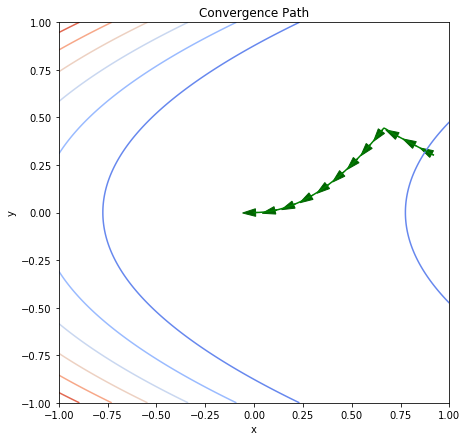

In [0]:
seq_plain = plain_gradient_descent(lambda x, y: x ** 2 + 100 * ((y - x ** 2) ** 2),lambda x, y: (2 * x * (1 - 200 * (y - x ** 2))),  lambda x, y : (200 * (y - x ** 2)))
make_convergence_plot(seq_plain, 2, 'x', 'y')

Number of Iterations: 54980
f* = 2.4898594194308433e-09
(x*, y*) = (4.9898491151272765e-05, 2.5405739890289506e-09)


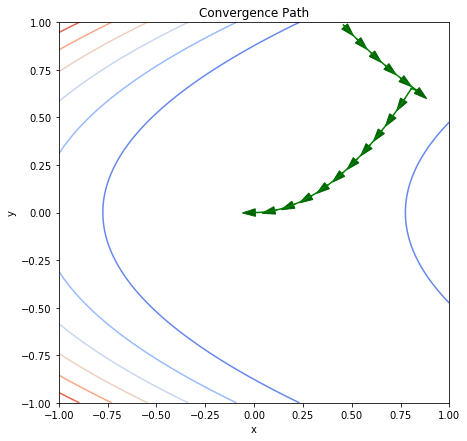

In [0]:
seq_polyak = polyak_gradient_descent(lambda x, y: x ** 2 + 100 * ((y - x ** 2) ** 2), lambda x, y: (2 * x * (1 - 200 * (y - x ** 2))),  lambda x, y : (200 * (y - x ** 2)))
make_convergence_plot(seq_polyak, 2, 'x', 'y')

Number of Iterations: 56153
f* = 2.4901095185214793e-09
(x*, y*) = (4.9900997167031876e-05, 2.540839781752244e-09)


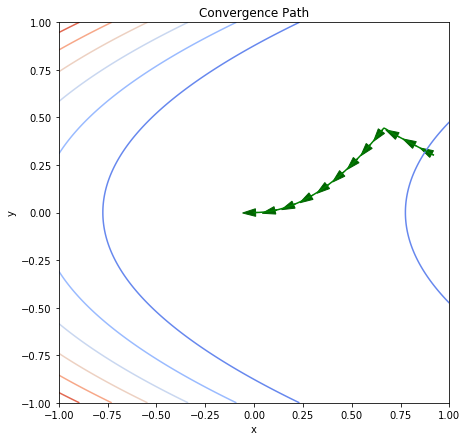

In [0]:
seq_nesterov = nesterov_gradient_descent(lambda x, y: x ** 2 + 100 * ((y - x ** 2) ** 2), lambda x, y: (2 * x * (1 - 200 * (y - x ** 2))),  lambda x, y : (200 * (y - x ** 2)))
make_convergence_plot(seq_plain, 2, 'x', ylabel = 'y')

Number of Iterations: 4812
f* = 0.126846889910418
(x*, y*) = (-0.3556263412738378, 0.12841121619752113)


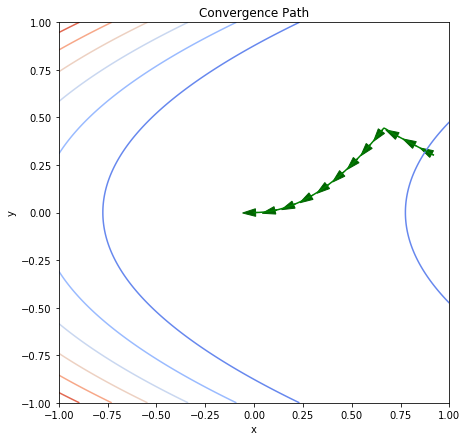

In [0]:
seq_adam = adam_gradient_descent(lambda x, y: x ** 2 + 100 * ((y - x ** 2) ** 2),lambda x, y: (2 * x * (1 - 200 * (y - x ** 2))),  lambda x, y : (200 * (y - x ** 2)))
make_convergence_plot(seq_plain, 2, 'x', ylabel = 'y')

---

# *Problem 3*

$f(x, y) = \frac{50}{9}(x^2 + y^2) ^ 3$
$ - \frac{209}{18}(x^2 + y^2)^2$
$ + \frac{59}{9}(x^2 + y^2)$

$Note\ that\ f(x, y)\ is\ symmetric\ in\ x\ and\ y$

- $\ \frac{\partial f}{\partial x} = \frac{100}{3}x(x^2 + y^2)^2$
$ - \frac{418}{9}x(x^2 + y^2)$
$ + \frac{118}{9}x$

- $\ \frac{\partial f}{\partial y} = \frac{100}{3}y(x^2 + y^2)^2$
$ - \frac{418}{9}y(x^2 + y^2)$
$ + \frac{118}{9}y$

In [0]:
def symmetric_function(x, y):
    term = x ** 2 + y ** 2
    return 50 / 9 * (term ** 3) - 209 / 18 * (term ** 2) + 59 / 9 * term

def gradient_x(x, y):
    term = x ** 2 + y ** 2
    return 100 / 3 * x * (term ** 2) - 418 / 9 * x * term + 118 / 9 * x

def gradient_y(x, y):
    term = x ** 2 + y ** 2
    return 100 / 3 * y * (term ** 2) - 418 / 9 * y * term + 118 / 9 * y

Number of Iterations: 275
f* = 0.5000000000011937
(x*, y*) = (0.9580876199430896, 0.2864744776946487)


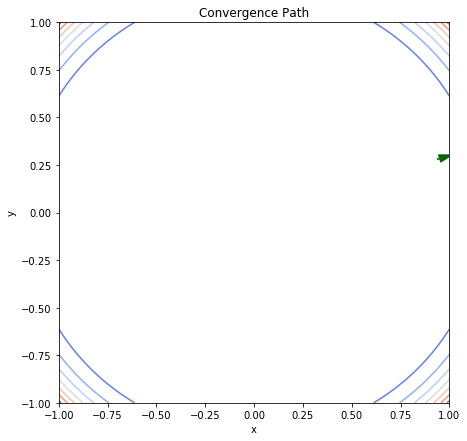

In [0]:
seq_plain = plain_gradient_descent(symmetric_function, gradient_x, gradient_y)
make_convergence_plot(seq_plain, 3, 'x', 'y')

Number of Iterations: 9807
f* = 5.43698759012393e-10
(x*, y*) = (7.520539230131056e-06, 5.136009008232163e-06)


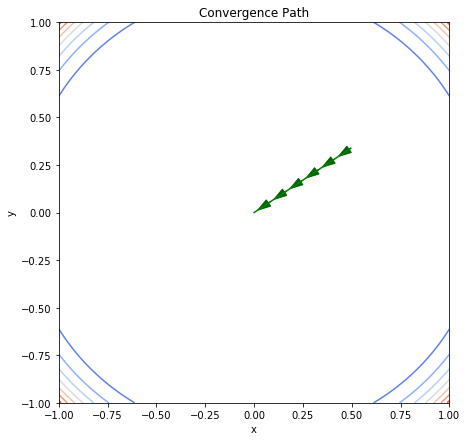

In [0]:
seq_polyak = polyak_gradient_descent(symmetric_function, gradient_x, gradient_y)
make_convergence_plot(seq_polyak, 3, 'x', 'y')

Number of Iterations: 2459
f* = 0.5000000001576606
(x*, y*) = (0.5283419807082532, 0.849034943824492)


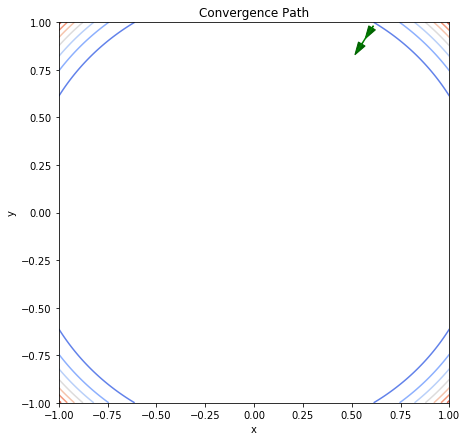

In [0]:
seq_nesterov = nesterov_gradient_descent(symmetric_function, gradient_x, gradient_y)
make_convergence_plot(seq_nesterov, 3, 'x', 'y')

Number of Iterations: 14099
f* = 0.5000000000001537
(x*, y*) = (0.932234729143186, 0.36185388734915924)


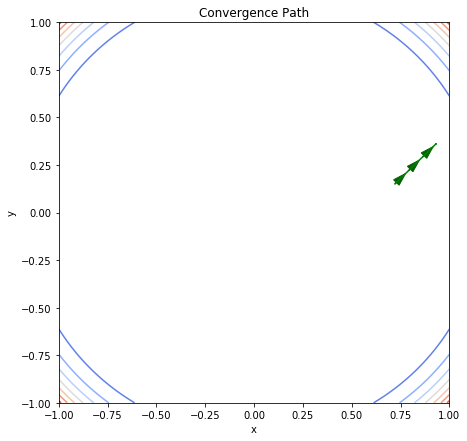

In [0]:
seq_adam = adam_gradient_descent(symmetric_function, gradient_x, gradient_y)
make_convergence_plot(seq_adam, 3, 'x', 'y')

---

# *Problem 4*

$Let\ our\ Classifier\ be\ f$

$Therefore, f(x) = sign(w_0.x_0 + w_1.x_1 +w_2.1),\ x\ being\ [x_0, x_1, 1]$

$where\ the\ weight\ vector\ W = [w_0, w_1, w_2]\ is\ to\ be\ learned$

In [0]:
# Generating Data according to the given problem specification
covmat = np.asarray([[16, 0], [0, 9]])
mean_A = np.asarray([-3, 4])
mean_B = np.asarray([4, -3])

train_A = np.random.multivariate_normal(mean_A, covmat, 200)
train_B = np.random.multivariate_normal(mean_B, covmat, 200)

test_A = np.random.multivariate_normal(mean_A, covmat, 100)
test_B = np.random.multivariate_normal(mean_B, covmat, 100)

train = np.concatenate((np.concatenate((train_A, train_B), axis = 0), np.asmatrix(np.ones(400)).T), axis = 1).T
train_labels = np.asmatrix(np.concatenate((np.ones(200), -1 * np.ones(200)), axis = 0))

test = np.concatenate((np.concatenate((test_A, test_B), axis = 0), np.asmatrix(np.ones(200)).T), axis = 1).T
test_labels = np.asmatrix(np.concatenate((np.ones(100), -1 * np.ones(100)), axis = 0))

N_train = 400 # training size
N_test = 200 # testing size

$if\ y\ is\ the\ set\ of\ N\ labels,$

$loss\ J\ = \frac{1}{N}||y - W^TX||^2 = \frac{1}{N}(y - W^TX)^T(y - W^TX) = \frac{1}{N}(y^Ty - y^TW^TX - X^TWy + X^TWW^TX$)

$\frac{dJ}{dW} = \frac{1}{N}(-y^TX - X^Ty + 2X^TWX) = \frac{2}{N}X^TWX - \frac{2}{N}X^Ty = \frac{2}{N}X^T(WX - y)$

<b>

$where\ X\ is\ the\ set\ of\ all\ samples$

<b>

- $note\ that\ it\ would\ be\ ideal\ to\ use\ a\ non-linearity\ like\ tanh$
- $but\ the\ problem\ specifies\ that\ a\ single\ linear\ output\ is\ to\ be\ used$
- $this\ is\ similar\ to\ a\ linear\ regression\ setting$

In [0]:
def training(train, eta = 0.0263):
    W_previous = np.asmatrix(np.zeros(3))
    W = np.asmatrix(np.ones(3))
    
    train_errors = []
    test_errors = []
    iteration = 0

    while np.linalg.norm(W - W_previous) > 1e-4:
        train_errors.append(1 / N_train * np.linalg.norm(train_labels - np.matmul(W, train)) ** 2)
        test_errors.append(1 / N_test * np.linalg.norm(test_labels - np.matmul(W, test)) ** 2)
        W_previous = W
        W = W - eta * 2 / N_train * np.matmul(train, (np.matmul(W, train) - train_labels).T).T
        iteration += 1

    print("Number of Iterations = " + str(iteration))
    return train_errors, test_errors, W

_, _, weights = training(train)
print("Computed Weights: " + str(np.matrix.tolist(weights)[0]))

Number of Iterations = 966
Computed Weights: [-0.07525206076951865, 0.11868054043478708, -0.06499858860540064]


### $Trying\ out\ various\ values\ to\ find\ the\ optimal\ learning\ rate$
#### $Note:\ exact\ values\ will\ differ\ based\ on\ data\ generation$

| $\eta$       | Number of Iterations|
| ------------- |:-------------:|
| $4\times10^{-3}$      | $564$ |
| $8\times10^{-3}$| $327$ |
| $2\times10^{-2}$| $154$ |
| $2.40\times10^{-2}$| $132$ |
| $2.41\times10^{-2}$| $131$ |
| $2.42\times10^{-2}$| $131$ |
| $2.44\times10^{-2}$| $130$ |
| $2.46\times10^{-2}$| $129$ |
| $2.48\times10^{-2}$| $128$ |
| $2.5\times10^{-2}$| $127$ |
| $2.6\times10^{-2}$| $123$ |
| $2.63\times10^{-2}$| $122$ |
| $2.64\times10^{-2}$| $123$ |
| $2.65\times10^{-2}$| $126$ |
| $2.7\times10^{-2}$| $260$ |
<br>

$So,\ 2.63\times10^{-2}\ seems\ to\ be\ a\ good\ learning\ rate,\ empirically$

$Formally,\ \eta_{opt}\ can\ be\ calculated\ as:$

$\eta_{opt} = \frac{||\nabla J||^2}{\nabla J^T\ H\ \nabla J}$

$here,\ H = \frac{d^2J}{dW^2} = \frac{2}{N}X^TX$

$and\ \nabla J = \frac{2}{N}X^T(WX - y)$

$using\ the\ approximation\ \eta_{opt} = \frac{1}{max(eigenvalue(H))},\ $
$where\ eigenvalue(H)\ is\ the\ set\ of\ eigenvalues\ of\ H$

$we\ get:\ \eta_{optimal} = 3.1982 \times 10^{-5}$

In [0]:
# finding the optimal learning rate
mat = 2 / N_train * np.matmul(train.T, train)
eigvals, _ = np.linalg.eig(mat)
eta_optimal = 1 / max(np.real(eigvals))
print("Optimal Learning Rate:", str(eta_optimal))

Optimal Learning Rate: 0.013210794979053225


In [0]:
# using the optimal learning rate
train_errors, test_errors, weights = training(train, eta = eta_optimal)
print("Computed Weights: " + str(np.matrix.tolist(weights)[0]))

Number of Iterations = 218
Computed Weights: [-0.07541875718809134, 0.11849756723457529, -0.06112472767984361]


In [0]:
# Equation of line in y = m.x + c format
m = -weights[0, 0] / weights[0 ,1]
c = -weights[0, 2] / weights[0, 1]

$We\ clearly\ need\ more\ iterations\ with\ the\ optimal\ learning\ rate$

$This\ is\ because,\ for\ computing\ optimal\ learning\ rate,$

$the\ formula\ used\ is\ an\ approximation\ for\ the\ second\ order\ method.$ 

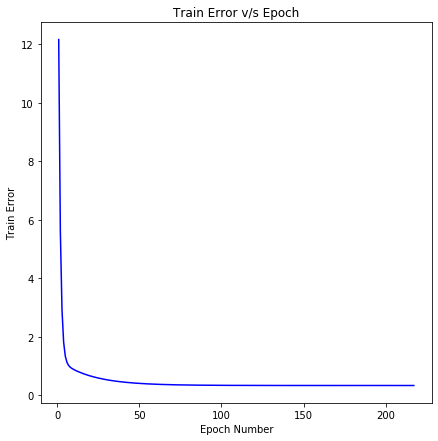

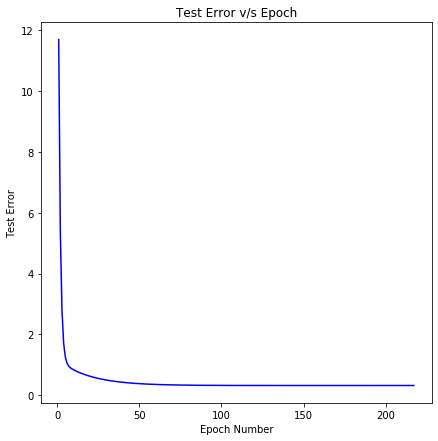

In [0]:
# Plot for Training Errors
fig = plt.figure(figsize=(7, 7))
p = fig.add_subplot('111')
p.set_title('Train Error v/s Epoch')
p.set_xlabel('Epoch Number')
p.set_ylabel('Train Error')
p.plot(list(range(1, len(train_errors))), train_errors[1:], color = 'blue')
plt.show()

# Plot for Testing Errors
fig = plt.figure(figsize=(7, 7))
q = fig.add_subplot('111')
q.set_title('Test Error v/s Epoch')
q.set_xlabel('Epoch Number')
q.set_ylabel('Test Error')
q.plot(list(range(1, len(train_errors))), test_errors[1:], color = 'blue')
plt.show()

$There\ is\ no\ chance\ of \ overfitting.$

$The\ loophole\ here\ is\ that\ we\ already\ know\ the\ structure\ of\ the\ data\ in\ our\ testing\ set.$

$There\ is\ no\ noise,\ no\ bias,\ and\ the\ test\ set\ is\ an\ almost\ perfect\ generalization\ of\ the\ train\ set.$

$The\ structure\ of\ the\ testing\ data\ is\ captured\ perfectly\ by\ the\ train\ set.$

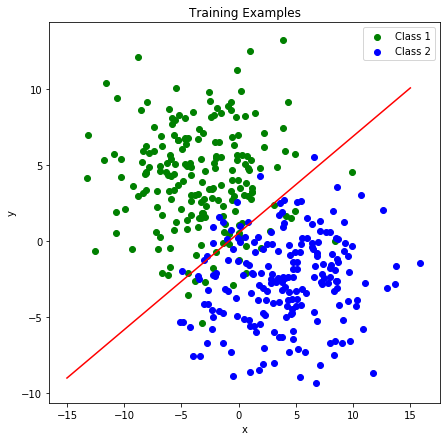

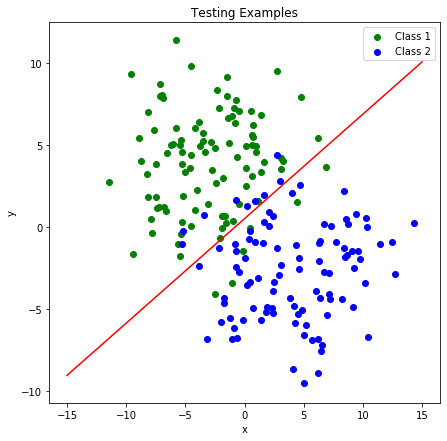

In [0]:
# Plot for the training and testing data
x = np.linspace(-15, 15, 300)
y = m * x + c

fig = plt.figure(figsize=(7, 7))
p = fig.add_subplot('111')
p.set_title('Training Examples')
p.set_xlabel('x')
p.set_ylabel('y')
p.scatter([point[0] for point in train_A], [point[1] for point in train_A], color = 'green', label = 'Class 1')
p.scatter([point[0] for point in train_B], [point[1] for point in train_B], color = 'blue', label = 'Class 2')
p.plot(x, y, '-r')
p.legend()
plt.show()

fig = plt.figure(figsize=(7, 7))
q = fig.add_subplot('111')
q.set_title('Testing Examples')
q.set_xlabel('x')
q.set_ylabel('y')
q.scatter([point[0] for point in test_A], [point[1] for point in test_A], color = 'green', label = 'Class 1')
q.scatter([point[0] for point in test_B], [point[1] for point in test_B], color = 'blue', label = 'Class 2')
q.plot(x, y, '-r')
q.legend()
plt.show()

$Bayes'\ error\ is\ irreducible\ and\ is\ the\ best\ that\ an\ oracle\ can\ do.$

$The\ data\ in\ our\ case\ is\ inherently\ stochastic.$

$In\ that,\ we\ know\ the\ exact\ distribution\ generating\ the\ data.$

$Still,\ we\ ourselves\ cannot\ make\ predictions\ about\ points\ accurately.$

$Have\ a\ look\ at\ the\ plots\ above.$

$There\ are\ plenty\ of\ outliers.$

$Clearly,\ no\ single\ line\ or\ curve\ can\ separate\ out\ the\ two\ classes.$

$Therefore,\ the\ noise\ is\ a\ result\ of\ the\ distribution\ itself\ and\ not\ external.$

$Thus,\ since\ we\ know\ the\ probability\ distribution\ generating\ the\ data,\ we\ are,$

$in\ theory\ already\ capable\ of\ achieving\ the\ minimum\ Bayes'\ error.$

$The\ key\ idea\ here\ is\ that\ the\ covariance\ matrices\ are\ the\ same\ for\ both\ classes.$

$This\ means\ that\ the\ hyperplane\ of\ separation\ (based\ purely\ on\ the\ distribution)$

$is\ a\ straight\ line\ equdistant\ from\ the\ two\ centres.$

$Since\ we\ are\ using\ a\ straight\ line\ for\ classification,\ we\ can\ be\ sure\ of\ least\ Bayes'\ Error.$



In [0]:
# Repeating the Experiment with normalized data

mean = np.mean(train, axis = 1)
print("Mean of train set: " + str(np.matrix.tolist(mean.T)[0]))

var = np.var(train, axis = 1)
print("Variance of train set: " + str(np.matrix.tolist(var.T)[0]))

mean[2][0] = 0
var[2][0] = 1

normalized_train = (train - mean) / np.sqrt(var)
normalized_test = (test - mean) / np.sqrt(var)
# we can not view the test set, so we use the mean and variance of the train set only

print("Mean of normalized train set: " + str(np.matrix.tolist((np.mean(normalized_train, axis = 1)).T)[0]))
print("Variance of normalized train set: " + str(np.matrix.tolist((np.var(normalized_train, axis = 1)).T)[0]))

Mean of train set: [0.3263739935172309, 0.7545517839095227, 1.0]
Variance of train set: [29.84689251203375, 20.99032767513383, 0.0]
Mean of normalized train set: [3.086420008457935e-16, -2.020605904817785e-16, 1.0]
Variance of normalized train set: [1.0000000000000009, 0.9999999999999978, 0.0]


In [0]:
# Optimal Learning rate for normalized data
mat = 2 / N_train * np.matmul(normalized_train.T, normalized_train)
eigvals, _ = np.linalg.eig(mat)
eta_optimal_normalized = 1 / max(np.real(eigvals))
print("Optimal Learning rate for normalized data:", str(eta_optimal_normalized))

Optimal Learning rate for normalized data: 0.3417988806732385


In [0]:
# Training on the normalized dataset
train_losses, test_losses, w = training(normalized_train, eta_optimal_normalized)

Number of Iterations = 20


In [0]:
_, _, _ = training(normalized_train, 0.45)

Number of Iterations = 15


#### $Clearly,\ the\ number\ of\ iterations\ reduces\ drastically\ to\ something\ in\ the\ 20s.$

$Thus,\ preprocessing\ is\ indeed\ beneficial.$

$Also\ note\ that\ the\ approximate\ equation\ does\ not\ give\ the\ optimal\ learning\ rate\ in\ this\ case.$

$Increasing\ \eta_{opt}\ slightly,\ results\ in\ faster\ convergence$

---

# *Thank You*

---